# Sierpinski's triangle (programmable logic)

This notebook will illustrate the fractal "Sierpinski's triangle".

This fractal is created, through recursion, by halfing the size of the original triangle's height and length. 

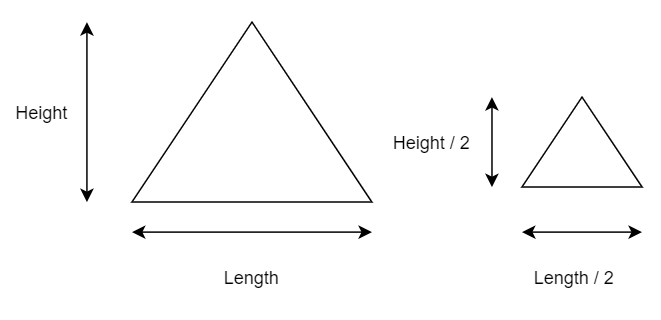

These new lengths are the size of our new triangles which we need 3 of. They are alligned as shown, note how the allignment has the same dimensions as the original triangle 

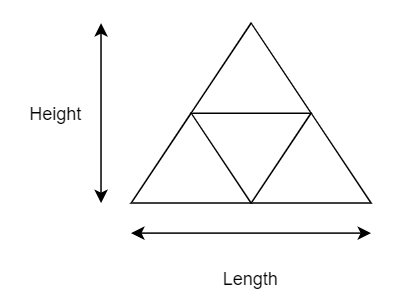

NOTE: This Notebook makes use of the resizer IP, as seen in the Pynq community example "Hello world resizer". See refrences in final cell

# Import libraries

In [1]:
from ipywidgets import *
from PIL import Image
import numpy as np
from IPython.display import display
from pynq import Xlnk
from pynq import Overlay

# Download resizer IP bitsream

In [2]:
resize_design = Overlay(
    "../bitstream/resizer.bit")

Create DMA and Resizer IP objects

In [3]:
dma = resize_design.axi_dma_0
resizer = resize_design.resize_accel_0

# Create an Image object using PIL in SW

The equilateral triangle image is loaded from the folder and a PIL image object is created

In [4]:
image_path = "images/mypng.png"
original_image = Image.open(image_path)
original_image.load()

# Create pixel array

The following line is used to tell Jupyter that the image should only be 3 components wide. All components holds the same data. We select the first three components.

Numpy is used to create the array of pixels

In [5]:
input_array = np.array(original_image)[:,:,0:3]

# Display original image

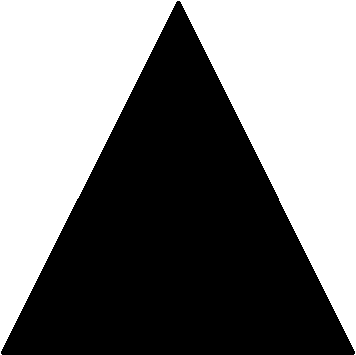

In [6]:
input_image = Image.fromarray(input_array)
display(input_image)

Note the dimensions of the original image, as the final fractal should be the same size

In [7]:
old_width, old_height = original_image.size
print("Image size: {}x{} pixels.".format(old_width, old_height))

Image size: 356x355 pixels.


In [8]:
xlnk = Xlnk()   

In [9]:
resizer.write(0x00,0x00) # reset IP

# Create slider

A slider is created so the user can select the number of iterations they want to execute for the fractal. To operate the slider run this cell then select desired number.

In [10]:
def update(limit):
    
    limit = limit
    
    

limit=widgets.IntSlider(min=1,max=10,step=1)

interact(update, limit=limit);

interactive(children=(IntSlider(value=1, description='limit', max=10, min=1), Output()), _dom_classes=('widget…

We now cast the slider limit value to an integer, this way it can be used for the number of times the for loop executes

In [11]:
limitIntValue = int(limit.value)

# Create slider to select number of iterations through fractal

A for loop executes the recursion, depending on how many iterations are selected from the slider. 

The box variables are a tuple that sets the co-ordinates of the resized images. We then paste these boxes to the original image to create our fractal.

In [12]:
for n in range(limitIntValue):
   
    resizer.write(0x00,0x00)                     #reset IP
    resize_factor = 2
    
    new_width = int(old_width/resize_factor)    #Determine new height & width for resizing
    new_height = int(old_height/resize_factor)

    resizer.write(0x10, old_height)             
    resizer.write(0x18, old_width)
    resizer.write(0x20, new_height)
    resizer.write(0x28, new_width)
        
    in_buffer = xlnk.cma_array(shape=(old_height, old_width, 3), dtype=np.uint8, cacheable=1)
    out_buffer = xlnk.cma_array(shape=(new_height, new_width, 3), dtype=np.uint8, cacheable=1)
    
    in_buffer[:,:,0:3] = np.array(original_image)[:,:,0:3]
      
    dma.recvchannel.transfer(out_buffer)
    dma.sendchannel.transfer(in_buffer)
    resizer.write(0x00,0x1) # start
    dma.sendchannel.wait()
    dma.recvchannel.wait()  
    resizer.write(0x00,0x00) # reset
    
    xlnk.xlnk_reset()
    
    out_buffer.shape
    
    result = Image.fromarray(np.array(out_buffer, dtype=np.uint8))
    np.array(result).shape
   

    u = int(new_width / 2)   # u and v are used for positioning the top triangle onto the peaks of the bottom two triangles
    v = int(3 * new_width / 2)
    
    box = (u, 0, v, new_height)  # box co-ordinate system               
    box2 = (0, new_height, new_width, 2 * new_height)
    box3 = (new_width, new_height, 2 * new_width, 2 * new_height )  

    original_image.paste(result, box) # Paste resized images onto original image
    original_image.paste(result, box2)
    original_image.paste(result, box3)

# Display Sierpinski's triangle

Now we can display our final fractal. Note that the size of the image is the same as the original image.

Image size: 356x355 pixels. 2


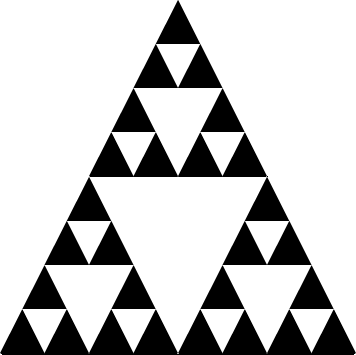

In [13]:
print("Image size: {}x{} pixels.".format(old_width, old_height), Image.BILINEAR)
display(original_image)

In [14]:
%%timeit

for n in range(limitIntValue):
   
    resizer.write(0x00,0x00)                     #reset IP
    resize_factor = 2
    
    new_width = int(old_width/resize_factor)    #Determine new height & width for resizing
    new_height = int(old_height/resize_factor)

    resizer.write(0x10, old_height)             
    resizer.write(0x18, old_width)
    resizer.write(0x20, new_height)
    resizer.write(0x28, new_width)
        
    in_buffer = xlnk.cma_array(shape=(old_height, old_width, 3), dtype=np.uint8, cacheable=1)
    out_buffer = xlnk.cma_array(shape=(new_height, new_width, 3), dtype=np.uint8, cacheable=1)
    
    in_buffer[:,:,0:3] = np.array(original_image)[:,:,0:3]
      
    dma.recvchannel.transfer(out_buffer)
    dma.sendchannel.transfer(in_buffer)
    resizer.write(0x00,0x1) # start
    dma.sendchannel.wait()
    dma.recvchannel.wait()  
    resizer.write(0x00,0x00) # reset
    
    xlnk.xlnk_reset()
    
    out_buffer.shape
    
    result = Image.fromarray(np.array(out_buffer, dtype=np.uint8))
    np.array(result).shape
   

    u = int(new_width / 2)   # u and v are used for positioning the top triangle onto the peaks of the bottom two triangles
    v = int(3 * new_width / 2)
    
    box = (u, 0, v, new_height)  # box co-ordinate system               
    box2 = (0, new_height, new_width, 2 * new_height)
    box3 = (new_width, new_height, 2 * new_width, 2 * new_height )  

    original_image.paste(result, box) # Paste resized images onto original image
    original_image.paste(result, box2)
    original_image.paste(result, box3)

10 loops, best of 3: 59.8 ms per loop


# Refrences

https://github.com/Xilinx/PYNQ-HelloWorld

https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks_advanced_features.ipynb

https://pillow.readthedocs.io/en/3.1.x/index.html

https://github.com/Xilinx/PYNQ/blob/master/docs/source/python_environment.ipynb